In [1]:
#Distributed under the MIT License.
#See LICENSE.txt for details.

%matplotlib inline
import numpy as np
import pylab as pl
import h5py

In [95]:
#get data dictionary
f = h5py.File('BurgersVariantStepVolume0.h5')['VolumeData.vol']

In [142]:
#make a dictionary where first element is sorted time, 
#second is ObservationID
TimeDict = {}

for obs in sorted(f):
    TimeDict[f[obs].attrs['observation_value']] = obs
    
SortedTimeDict = dict(sorted(TimeDict.items()))

In [143]:
#pass in TimestepNumber and return ObservationId
def TimestepToObsID(TimestepNumber):
    return SortedTimeDict[list(SortedTimeDict)[TimestepNumber]]

In [148]:
#pass in TimestepNumber and plot V(x)
def PlotTimestep(TimestepNumberm):
    ObsID = TimestepToObsID(TimestepNumber)
    x = f[ObsID]['InertialCoordinates_x'][:]
    V = f[ObsID]['V'][:]
    
    pl.plot(x, V, 'k.')
    pl.show()
    
    return 0

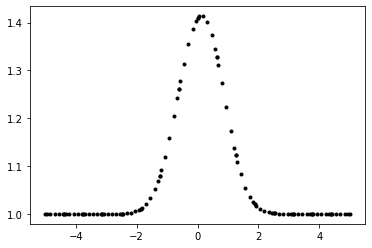

0

In [147]:
PlotTimestep(25)